In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support,classification_report
from sklearn.metrics import confusion_matrix

In [285]:
data = pd.read_csv("dataset\\ai4i2020.csv")

In [286]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [287]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [289]:
data.shape

(10000, 14)

In [290]:
MF = data['TWF'] | data['HDF'] | data['PWF'] | data['OSF'] | data['RNF']
MF.value_counts()

0    9652
1     348
dtype: int64

In [291]:
data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [292]:
points = data['Machine failure'].eq(MF)
points.value_counts()

True     9973
False      27
dtype: int64

In [293]:
points.shape

(10000,)

In [294]:
data[points == False]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0


27 datapoints have wrong values for machine failure even if one of the failure modes are true.

In [295]:
data[points == False].describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,27.0,27.0,27.000000
mean,4900.444444,300.622222,310.570370,1495.518519,42.911111,119.000000,0.333333,0.0,0.0,0.0,0.0,0.666667
std,2272.428679,1.820679,1.414979,117.519678,10.515495,65.760638,0.480384,0.0,0.0,0.0,0.0,0.480384
min,1222.000000,297.000000,307.700000,1306.000000,27.300000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,2908.000000,299.450000,309.550000,1416.000000,33.650000,65.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,5496.000000,300.600000,310.700000,1447.000000,45.200000,140.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,6285.500000,302.400000,311.850000,1586.000000,50.050000,171.000000,1.000000,0.0,0.0,0.0,0.0,1.000000
max,9016.000000,303.600000,312.500000,1710.000000,61.200000,215.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


C:\Users\Niharika\AppData\Local\Temp\ipykernel_24420\340682121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = inputFeatures.corr()


<AxesSubplot: >

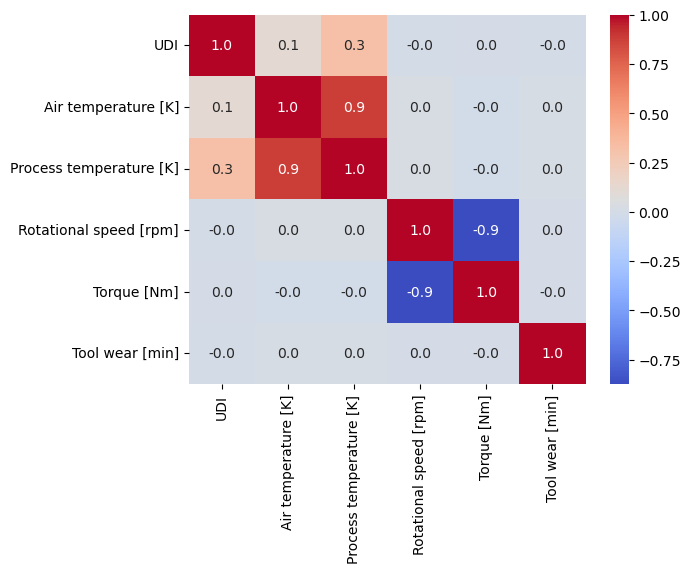

In [296]:
correlationMatrix = inputFeatures.corr()
sns.heatmap(correlationMatrix,annot=True,fmt='.1f',cmap='coolwarm')

In [297]:
data['MF'] = data['TWF'] | data['HDF'] | data['PWF'] | data['OSF'] | data['RNF']

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
 14  MF                     

In [299]:
target = data['MF']
target.value_counts()

0    9652
1     348
Name: MF, dtype: int64

TWF,HDF,PWF,OSF,RNF are the independentfailure modes and hence not considered as input variables

In [300]:
data.drop(["TWF","HDF","PWF","OSF","RNF"], axis = 1,inplace=True)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   MF                       10000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 781.4+ KB


In [302]:

inputFeatures = data.drop(['Machine failure','MF','Product ID'],axis=1)
#extract only numerical colums
numColumns = inputFeatures.select_dtypes(include=np.number)

In [303]:
# standardize the data to have 0 mean and unit variance
scaler= StandardScaler()
standardizedInput = scaler.fit_transform(numColumns)

In [304]:
standardizedInput = pd.DataFrame(standardizedInput, columns=numColumns.columns)
inputData = pd.concat([standardizedInput, inputFeatures.select_dtypes(include=['object'])], axis=1)

In [305]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Type                     10000 non-null  object 
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [306]:
#one-hot encoding for Type variable. Converting doing one hot encoding for Type variable. Converting Type column to 3 separate variables 
#called Type_L, Type_M and Type_H. There are 3 types of categorical levels in Type.
#Therefore converting the Type column to 3 separate variables
oneHotEncodingType = pd.get_dummies(data['Type'],prefix='Type')
inputData = pd.concat([inputData,oneHotEncodingType],axis=1)
inputData.drop('Type',axis=1,inplace=True)

In [307]:
inputData = inputData.astype('float64')

In [308]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Type_H                   10000 non-null  float64
 7   Type_L                   10000 non-null  float64
 8   Type_M                   10000 non-null  float64
dtypes: float64(9)
memory usage: 703.2 KB


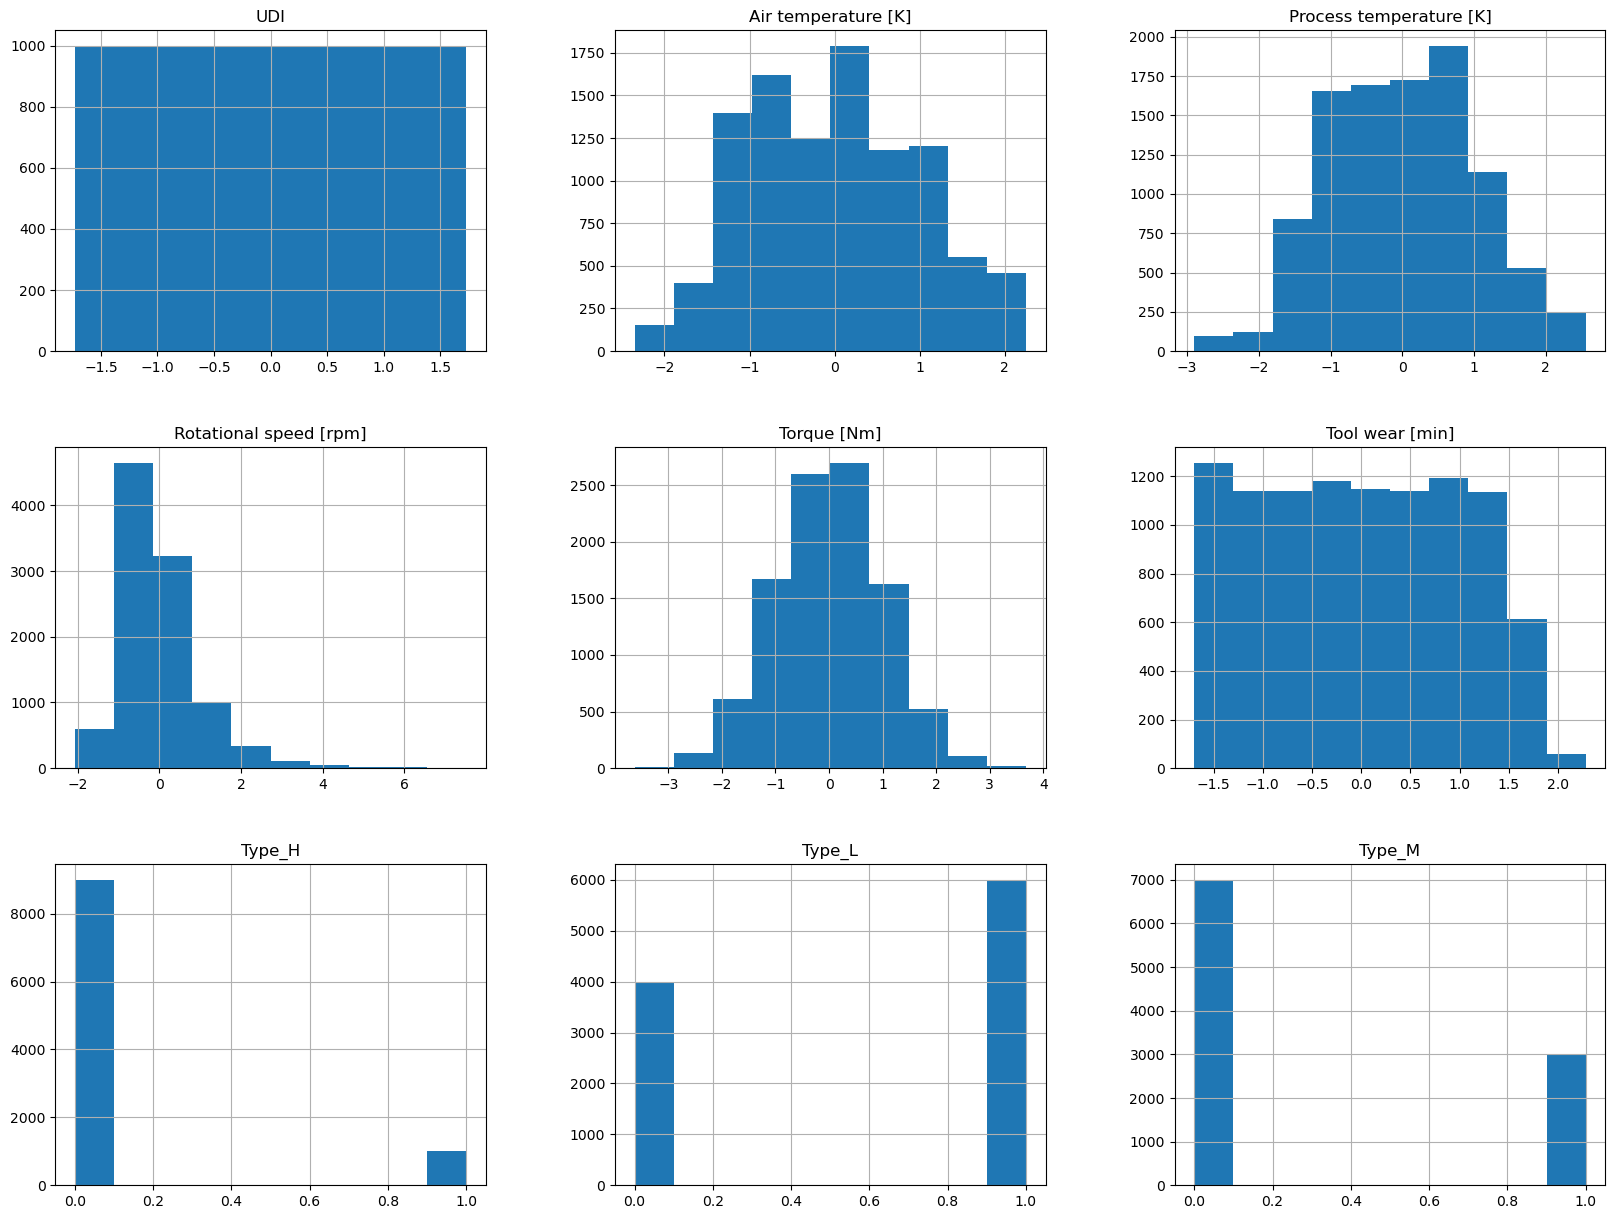

In [309]:
#DATA VISUALIZATION
inputData.hist(bins=10, figsize=(20,15))
plt.show()

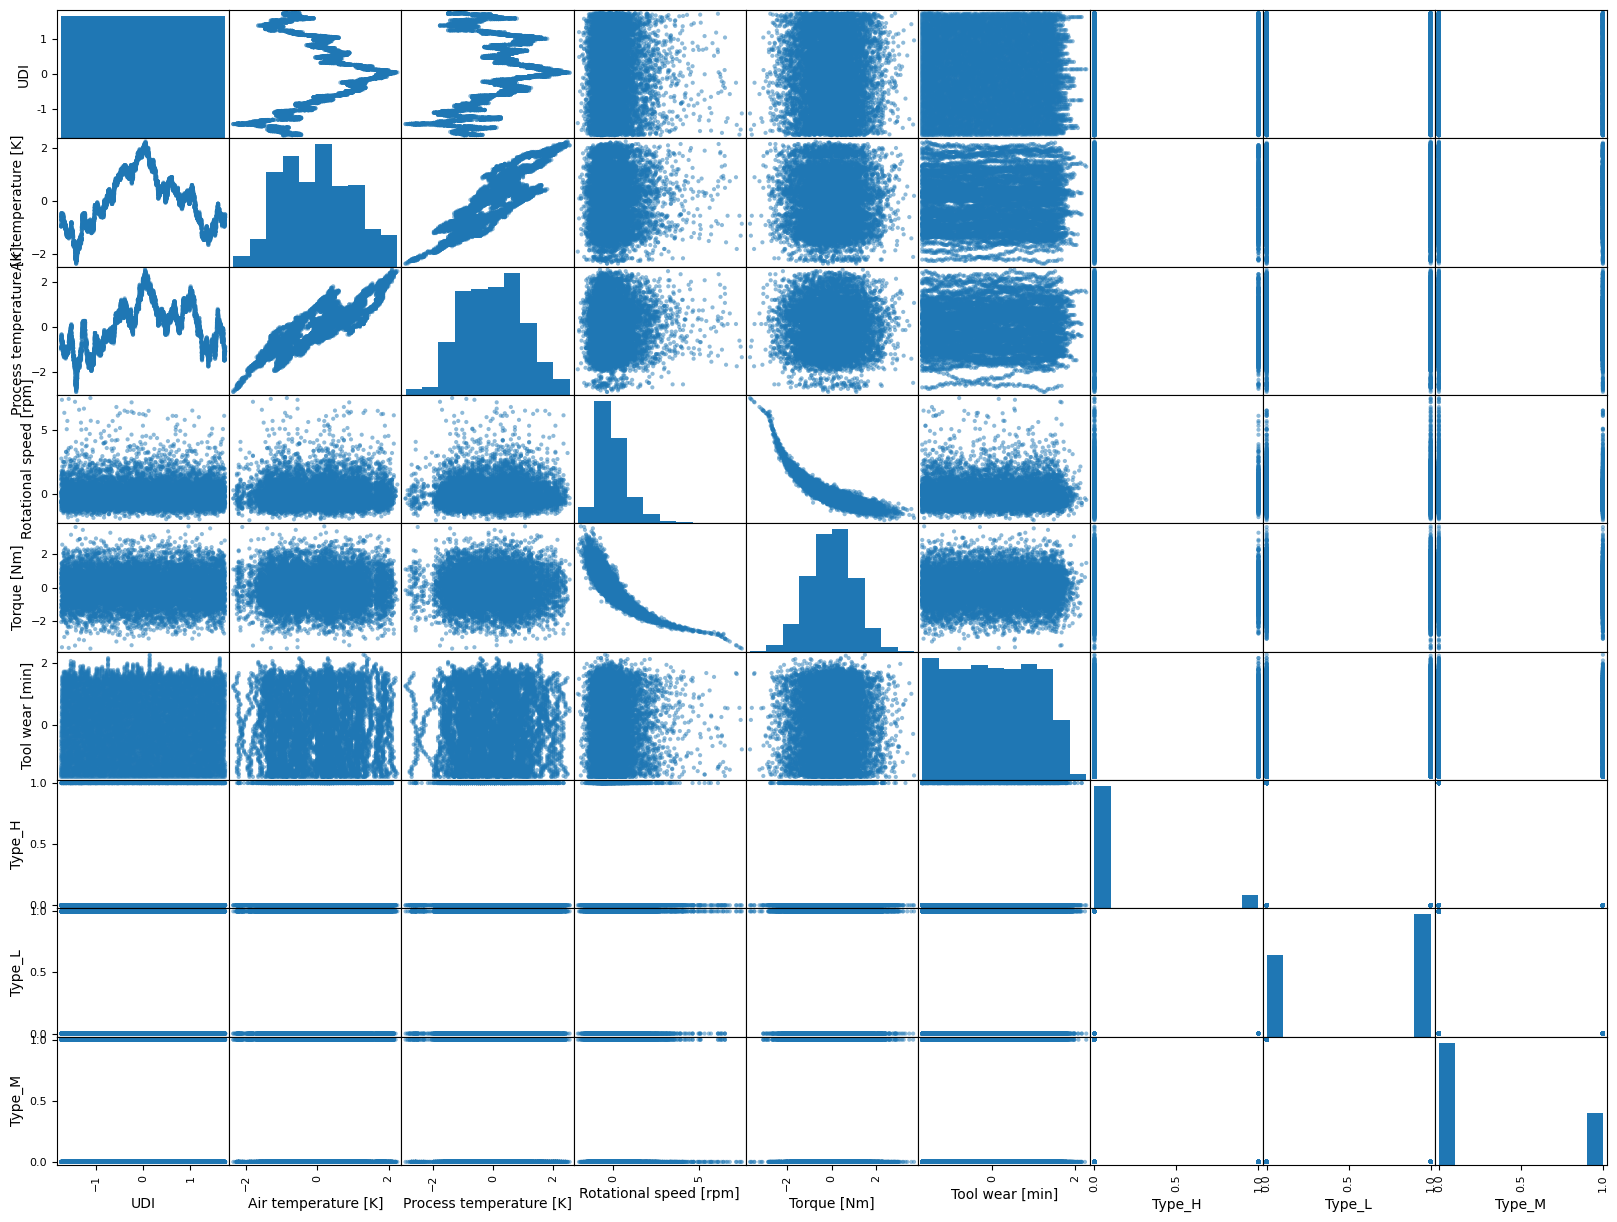

In [310]:
pd.plotting.scatter_matrix(inputData,figsize=(20,15))
plt.show()

<AxesSubplot: >

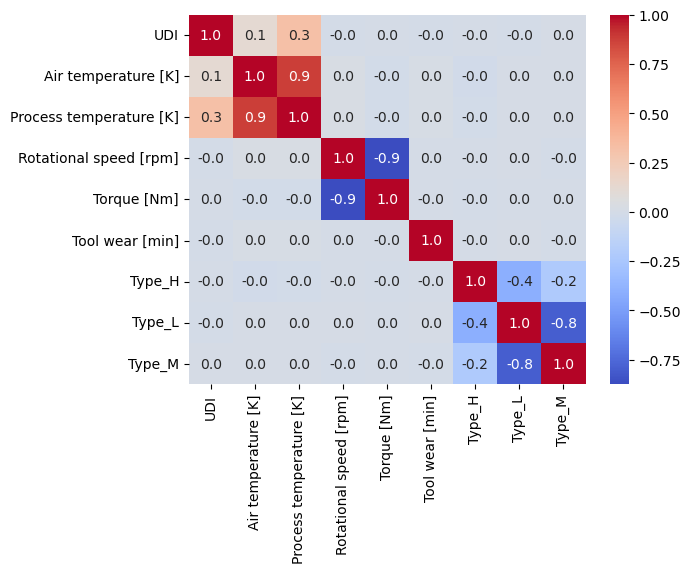

In [311]:
correlationMatrix = inputData.corr()
sns.heatmap(correlationMatrix,annot=True,fmt='.1f',cmap='coolwarm')

Data visualization:
In the histogram plot, the rotational speed variable is a little skewed towards the right
In correlation matrix,air temperature and process temperature are highly correlated with a value of 0.9. We may consider removing any one of them
Torque and rotational speed are inversely correlated with a value of -0.9

In [312]:
#split the dataset into test and train. use stratify to make sure 
# that the test and train dataset get proportionate number of each type of output
#train_set, test_set = split_train_test(inputFeatures, 0.25)
X_train, X_test, y_train, y_test = train_test_split(inputData,target, test_size=0.25,stratify=target,random_state=42)

In [313]:
X_train.shape

(7500, 9)

In [314]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 2889 to 6402
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      7500 non-null   float64
 1   Air temperature [K]      7500 non-null   float64
 2   Process temperature [K]  7500 non-null   float64
 3   Rotational speed [rpm]   7500 non-null   float64
 4   Torque [Nm]              7500 non-null   float64
 5   Tool wear [min]          7500 non-null   float64
 6   Type_H                   7500 non-null   float64
 7   Type_L                   7500 non-null   float64
 8   Type_M                   7500 non-null   float64
dtypes: float64(9)
memory usage: 585.9 KB


In [315]:
X_train.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
2889,-0.731099,0.347507,-0.205950,-0.087999,-0.179257,-0.549104,0.0,0.0,1.0
271,-1.638000,-0.952389,-1.284364,-0.484039,0.081566,-0.816186,0.0,0.0,1.0
8546,1.228544,-0.802401,-0.475554,0.988558,-1.162360,-0.659079,0.0,1.0,0.0
6849,0.640686,0.547492,0.872464,-0.227450,-0.239447,-1.523166,0.0,1.0,0.0
8349,1.160301,-0.652413,-0.340752,-0.288808,-0.640713,1.179071,0.0,0.0,1.0


In [316]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 2889 to 6402
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      7500 non-null   float64
 1   Air temperature [K]      7500 non-null   float64
 2   Process temperature [K]  7500 non-null   float64
 3   Rotational speed [rpm]   7500 non-null   float64
 4   Torque [Nm]              7500 non-null   float64
 5   Tool wear [min]          7500 non-null   float64
 6   Type_H                   7500 non-null   float64
 7   Type_L                   7500 non-null   float64
 8   Type_M                   7500 non-null   float64
dtypes: float64(9)
memory usage: 585.9 KB


In [317]:
# Convert arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [318]:
# Save X_train, X_test, y_train, and y_test as separate CSV files
X_train_df.to_csv('dataset\\X_train.csv', index=False,header=False)
X_test_df.to_csv('dataset\\X_test.csv', index=False,header=False)
y_train_df.to_csv('dataset\\y_train.csv', index=False,header=False)
y_test_df.to_csv('dataset\\y_test.csv', index=False,header=False)

In [319]:
# Load X_train, X_test, y_train, and y_test from the saved CSV files
X_train = np.genfromtxt("dataset\\X_train.csv", delimiter=",",dtype=None, encoding=None)
X_test = np.genfromtxt("dataset\\X_test.csv", delimiter=",",dtype=None, encoding=None)
y_train = np.genfromtxt("dataset\\y_train.csv", delimiter=",",dtype=None, encoding=None)
y_test = np.genfromtxt("dataset\\y_test.csv", delimiter=",",dtype=None, encoding=None)

In [320]:
print("X_train size = ", X_train.shape)
print("X_test size = ", X_test.shape)
print("y_train size = ", y_train.shape)
print("y_train size = ", y_test.shape)


X_train size =  (7500, 9)
X_test size =  (2500, 9)
y_train size =  (7500,)
y_train size =  (2500,)


In [321]:
y_train = np.ravel(y_train)

In [322]:
type(y_train)

numpy.ndarray

In [323]:
#Train the Logistic Regression Model
yPredLR = [None]*len(X_test)
logisticRegression = LogisticRegression(max_iter=1000)
logisticRegression.fit(X_train,y_train)
yPredLR = logisticRegression.predict(X_test)

In [329]:
#fitting the data to a KNN classifier
yPredkNN = [None]*len(X_test)
knnclassifier = KNeighborsClassifier(n_neighbors=1)
knnclassifier.fit(X_train,y_train)
yPredkNN = knnclassifier.predict(X_test)

In [330]:
#fitting the data to the decison tree classifier
yPredDT = [None]*len(X_test)
decisionTree = tree.DecisionTreeClassifier(max_depth = 5)
decisionTree.fit(X_train,y_train)
yPredDT = decisionTree.predict(X_test)

In [331]:
#fitting the data to a random forest classifier
yPredRF = [None]*len(X_test)
randomForest = ensemble.RandomForestClassifier(n_estimators=4)
randomForest.fit(X_train,y_train)
yPredRF = randomForest.predict(X_test)

In [332]:
#fitting the data to a XGBoost classifier
yPredXGB = [None]*len(X_test)
XGB = ensemble.GradientBoostingClassifier(n_estimators=100)
XGB.fit(X_train,y_train)
yPredXGB = XGB.predict(X_test)

In [333]:
# Calculate accuracy,precision, recall and f1 score for Logistic Regression
lrAccuracy = accuracy_score(y_test,yPredLR)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test,yPredLR, average = 'weighted')
print("\033[34mEvaluation Metrics for Logistic Regression:\033[0m")
print("Accuracy: ", lrAccuracy)
print("Precision: ", precision)
print("Recall: ",recall)
print("F1-score:", f1_score)

Evaluation Metrics for Logistic Regression:
Accuracy:  0.9668
Precision:  0.9572875991265372
Recall:  0.9668
F1-score: 0.9550493368014082


In [334]:
#classification report for logistic regression
print(classification_report(y_test, yPredLR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2413
           1       0.64      0.10      0.18        87

    accuracy                           0.97      2500
   macro avg       0.81      0.55      0.58      2500
weighted avg       0.96      0.97      0.96      2500



In [335]:
#classification report for knn classifier
print(classification_report(y_test,yPredkNN))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2413
           1       0.52      0.43      0.47        87

    accuracy                           0.97      2500
   macro avg       0.75      0.71      0.73      2500
weighted avg       0.96      0.97      0.96      2500



In [336]:
#classification report for Decision Tree
print(classification_report(y_test,yPredDT)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2413
           1       0.62      0.55      0.59        87

    accuracy                           0.97      2500
   macro avg       0.80      0.77      0.79      2500
weighted avg       0.97      0.97      0.97      2500



In [337]:
#classification report for random forest classifier
print(classification_report(y_test,yPredRF)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2413
           1       0.87      0.47      0.61        87

    accuracy                           0.98      2500
   macro avg       0.93      0.73      0.80      2500
weighted avg       0.98      0.98      0.98      2500



In [338]:
#classification report for XGBoost classifier
print(classification_report(y_test,yPredXGB)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2413
           1       0.86      0.69      0.76        87

    accuracy                           0.99      2500
   macro avg       0.92      0.84      0.88      2500
weighted avg       0.98      0.99      0.98      2500

